In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def simulate(v):
    c=1
    p=c*v[0]
    y=[0,0,p]

    for n in range(len(v)-1):
        p=p*(1/(2.71828**2))+(c*v[n+1])
        y.append(p)

    plt.plot(y)
    plt.show()
#     print(y)

In [3]:
v1 = [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]
v2 = [0,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0]
v3 = [0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0]
v4 = [0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0]
v5 = [0,1,0,1,1,0,1,1,1,0,1,0,1,1,0,1,1,1,0,1,0,1,1,0,1,1,1,0,1,0,1,1,0,1,1,1,0,1,0,1,1,0,1,1,1,0,1,0,1,1,0,1,1,1,0]
v6 = [1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [4]:
# simulate(v1)

In [5]:
# simulate(v2)

In [6]:
# simulate(v3)

In [7]:
# simulate(v4)

In [8]:
# simulate(v5)

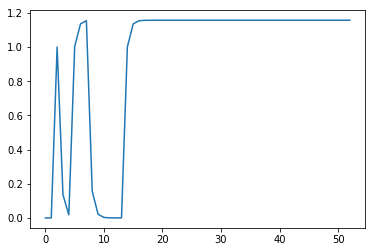

In [9]:
simulate(v6)

In [ ]:
def cost_function(O, Y):
    # determines the mean square difference between the expected Y and our actual Y
    cost = np.square(Y - O).mean()
    return cost

def sigmoid(s):
    # activation function
    return 1/(1+np.exp(-s))

In [10]:
class NGN:
    
    def __init__(self, Y, X, hidden_size, output_size):
        input_size = len(X[0])
        no_of_subset = int(hidden_size/subset_size)

        chromosome_w1 = input_size*hidden_size
        chromosome_w2 = hidden_size*output_size

        # weights
        W1 = weights[:chromosome_w1].reshape(input_size, hidden_size)
        W2 = weights[chromosome_w1+chromosome_wh:].reshape(hidden_size, output_size)
        self.c1=1
        self.c2=1
        self.substrate = np.zeroes((input_size, hidden_size))
        self.product = np.zeroes((input_size, hidden_size))
        self.activity = np.zeroes((input_size, hidden_size))
        
    def simulate(substrate, previous_p, activity):
        product = previous_p*(1/(2.71828**2))+(self.c2*substrate)
        substrate = self.c1*activity
        
        return substrate, product

    def delayed_inhibition(subset_size, weights):
        Y=[]
        # dot product of X (input) and first set of weights W1
        hidden_summation = np.matmul(X, W1)
        
        for x in range(len(X)):
            self.substrate[x], self.product[x] = simulate(self.substrate[x], self.product[x], self.activity[x])
            for r in range(no_of_subset):
                # summate subset rows
                inhibition_val = 1 - np.sum(self.adenosine[x, subset_size*r:(subset_size*r)+subset_size], axis=0)
                hidden_summation[x, subset_size*r:(subset_size*r)+subset_size] = hidden_summation[x, subset_size*r:(subset_size*r)+subset_size]*inhibition_val 

            hidden_activation = sigmoid(np.array(hidden_summation[x])) # activation function
                         
            # convert activation to binary value
            self.activity[x] = (hidden_activation>0.5).astype(int)

            # dot product of hidden layer (z2) and second set of 36x1 weights
            z3 = np.dot(hidden_activation, W2)
            # final activation function	
            o = sigmoid(z3)

            Y.append(o[0])

        return Y
                         
    def excitation_inhibition(subset_size, weights):
        Y=[]
        # dot product of X (input) and first set of weights W1
        hidden_summation = np.matmul(X, W1) + self.substrate

        for x in range(len(X)):
            self.product[x] = simulate(self.product[x], self.activity[x])
            for r in range(no_of_subset):
                # summate subset rows
                inhibition_val = 1 - np.sum(self.product[x, subset_size*r:(subset_size*r)+subset_size], axis=0)
                hidden_summation[x, subset_size*r:(subset_size*r)+subset_size] = hidden_summation[x, subset_size*r:(subset_size*r)+subset_size]*inhibition_val 

            hidden_activation = sigmoid(np.array(hidden_summation[x])) # activation function
                         
            # convert activation to binary value
            self.activity[x] = (hidden_activation>0.5).astype(int)

            # dot product of hidden layer (z2) and second set of 36x1 weights
            z3 = np.dot(hidden_activation, W2)
            # final activation function	
            o = sigmoid(z3)

            Y.append(o[0])

        return Y

In [ ]:
def Genetic_Evolve(subset_size, ngn, algo):

    output_size = ngn.Y
    init_population = 100
    mutation_rate = 0.05
    num_generations = 22
    winners_per_gen = 20
    error_reducing_trend = []

    if algo == 'NGN':
        chromosome = (len(X[0])*hidden_size)+(hidden_size*subset_size)+(hidden_size*output_size)
    else:
        chromosome = (len(X[0])*hidden_size)+(hidden_size*output_size)

    # initialize current population to random values within range
    current_population = np.random.uniform(0, 1, init_population*chromosome).reshape(init_population, chromosome)

    # initialize next population array
    next_population = np.zeros((current_population.shape[0], current_population.shape[1]))
    # 1st column is index of the individual in population, 2nd column is cost
    fit_vector = np.zeros((init_population, 2))

    # iterate through every generation
    for current_generation in range(num_generations):
        for x in range(init_population):
            if algo == 'delayed_inhibition':
                O = ngn.delayed_inhibition(subset_size, current_population[x])
            if algo == 'excitation_inhibition':
                O = ngn.excitation_inhibition(subset_size, current_population[x])
            else:
                O = NN(X, current_population[x], hidden_size, output_size)
            cost = np.sum(cost_function(O, Y))
            # create vec of all errors from cost function
            fit_vector[x] = np.array([x, cost])
        print("(Generation: #%s) Total error: %s\n" % (current_generation, np.sum(fit_vector[:,1])))
        error_reducing_trend.append([current_generation, np.sum(fit_vector[:,1])])

        winners = np.zeros((winners_per_gen, chromosome))

        for n in range(winners_per_gen):
            # select 20/2=10 index values randomly within range of fit_vector's length
            selected = np.random.choice(range(len(fit_vector)), int(winners_per_gen/2), replace=False)
            # find the index of minimum cost value from randomly selected individuals in fit_vector
            winner = np.argmin(fit_vector[selected, 1])
            winners[n] = current_population[int(fit_vector[selected[winner]][0])]

        # populate new generation with winners
        next_population[:len(winners)] = winners

        # populate rest of the generation with offspring of mating pairs
        next_population[len(winners):] = np.array([np.array(np.random.permutation(np.repeat(winners[:, i], ((init_population - len(winners))/len(winners)), axis=0))) for i in range(winners.shape[1])]).T

        # randomly mutate part of the population
        next_population = np.array(np.multiply(next_population, np.matrix([np.float(np.random.normal(0,2,1)) if random.random() < mutation_rate else 1 for x in range(next_population.size)]).reshape(next_population.shape)))

        current_population = next_population

    # return best solution weight
    return current_population[int(np.argmin(fit_vector[:, 1]))], error_reducing_trend

In [12]:
x = [1,1,1,2,2,2,3,3,3]
x[3*1:(3*1)+3] = np.array(x[3*0:(3*0)+3])*5
x

[1, 1, 1, 5, 5, 5, 3, 3, 3]

In [ ]:
Y, X = read_input(filename='breast-cancer-wisconsin.csv', Y_pos=10, X_pos=(1, 9))


output_size=1
neuron_glia_power=8
subset_sizes = [2, 3, 4, 5, 6, 8, 10, 12, 15, 16, 20, 24, 30, 40, 48, 60, 80, 120]
subset_error_values = []
error_trend_values = []

hidden_size = 240

ngn = NGN(Y, X, hidden_size, output_size)

for i in range(5):
    for subset_size in subset_sizes:
        solution_weight, error_reducing_trend = Genetic_Evolve(subset_size, ngn, 'inhibition')
        soultion = NGN(X, solution_weight, hidden_size, subset_size, output_size, neuron_glia_power)
        error = cost_function(soultion, Y)
        subset_error_values.append([subset_size, error])
        error_trend_values.append([subset_size, error_reducing_trend])
